# Importing modules and input data

In [90]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import albumentations as A
from sklearn.model_selection import train_test_split

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

# Splitting the data and creating the appropriate dataset

In [91]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

# Setting up the model

In [92]:
f_mnist_model = tf.keras.Sequential([
# spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fitting the model

In [93]:
train_stats = f_mnist_model.fit(train_ds, epochs=20, verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7865 - loss: 0.6037
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8650 - loss: 0.3749
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8787 - loss: 0.3304
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8856 - loss: 0.3084
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8916 - loss: 0.2879
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8973 - loss: 0.2765
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9025 - loss: 0.2588
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9087 - loss: 0.2453
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9120 - loss: 0.2319
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9159 - loss: 0.2252
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9176 - loss: 0.2130
Epoch 12/20
1688/1688 ━

# Prediction

In [94]:
y_pred = f_mnist_model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Visualizing one example image and saving the model

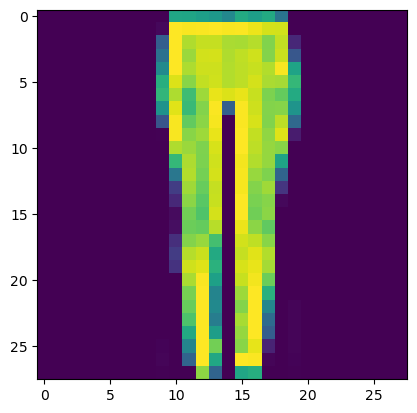

In [95]:
plt.imshow(images[102])

f_mnist_model.save('model_1.keras')

### The image shows trousers. Therefore, the inout images are loaded correctly.

# Transforming and extending the images with albumentations

In [96]:
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.2)
])

In [97]:
new_images = transform(image=images)
new_images=new_images["image"]

In [98]:
images_extended=np.append(images,new_images,axis=0)
labels_extended=np.append(labels,labels,axis=0)

# Splitting the extended data and creating the dataset

In [99]:
X_train, X_test, y_train, y_test = train_test_split(images_extended, labels_extended, test_size=0.1, random_state=10, stratify=labels_extended)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_ds = train_ds.shuffle(1000).batch(32)

# Setting up the new model

In [100]:
new_model_extended = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])
new_model_extended.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Evaluating the new model

In [101]:
train_stats = new_model_extended.fit(train_ds, epochs=25, verbose=1)

Epoch 1/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8110 - loss: 0.5254
Epoch 2/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8775 - loss: 0.3311
Epoch 3/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8942 - loss: 0.2862
Epoch 4/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9027 - loss: 0.2578
Epoch 5/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9101 - loss: 0.2372
Epoch 6/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9143 - loss: 0.2216
Epoch 7/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9214 - loss: 0.2035
Epoch 8/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9269 - loss: 0.1913
Epoch 9/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9319 - loss: 0.1783
Epoch 10/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9353 - loss: 0.1686
Epoch 11/25
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9387 - loss: 0.1604
Epoch 12/25
3375/33

### The extended model reaches a higer accuracy (about 0.97) in contrast to the inital model with an accuracy of roughly 0.94.